# Курс Data Science
## Модуль 12.3 Домашняя работа

**Задание простого уровня** Загрузите данные из файла `non_linear.csv` и сгенерируйте данные до степени *degree = 8* включительно. Обучите модель `sklearn.linear_model.Lasso` и модель `sklearn.linear_model.Ridge` на полученных данных, используйте коэффициент регуляризации $\alpha=0.8$ для обеих моделей. Постройте два столбчатых графика, на которых отобразите величину коэффициентов для Ridge регрессии и Lasso регрессии в виде столбиков.

Пример графиков для 3-й степени (просто для примера, у вас может по-другому выглядеть). Какой можно сделать в вывод по величине коэффициентов?:
![coeff_example](https://pp.userapi.com/c850136/v850136613/19282c/OfwruuxOkPw.jpg)

In [76]:
import numpy as np
import pandas as pd
data = pd.read_csv('non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


In [77]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [78]:
def generate_degrees(source_data: list, degree: int):
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [79]:
graph_Ridge_valid = []
graph_Ridge_train = []
graph_Lasso_valid = []
graph_Lasso_train = []
for degree in range(1,9):
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(
        X, y, test_size=0.2, random_state=10)
    model_Ridge = Ridge(alpha=0.8).fit(X_train, y_train)
    model_Lasso = Lasso(alpha=0.8).fit(X_train, y_train)
    y_pred_Ridge = model_Ridge.predict(X_valid)
    y_pred_train_Ridge = model_Ridge.predict(X_train)
    y_pred_Lasso = model_Lasso.predict(X_valid)
    y_pred_train_Lasso = model_Lasso.predict(X_train)
    graph_Ridge_valid.append(
        mean_squared_error(y_valid, y_pred_Ridge)
        )
    graph_Ridge_train.append(
        mean_squared_error(y_train, y_pred_train_Ridge)
        )
    
    graph_Lasso_valid.append(
        mean_squared_error(y_valid, y_pred_Lasso)
        )
    graph_Lasso_train.append(
        mean_squared_error(y_train, y_pred_train_Lasso)
        )


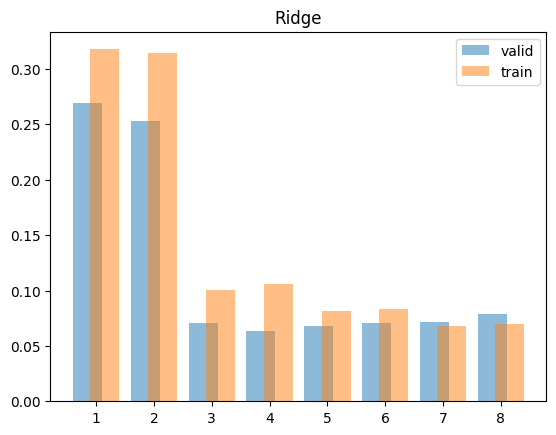

In [82]:
ax = [1,2,3,4,5,6,7,8]
import matplotlib.pyplot as plt

# Для перезагрузки plt
from importlib import reload
plt=reload(plt)

plt.bar(np.array(ax) - 0.15, graph_Ridge_valid, alpha=0.5, width=0.5)
plt.bar(np.array(ax) + 0.15, graph_Ridge_train, alpha=0.5, width=0.5)
plt.title('Ridge')
plt.legend(["valid", "train"])
plt.show()

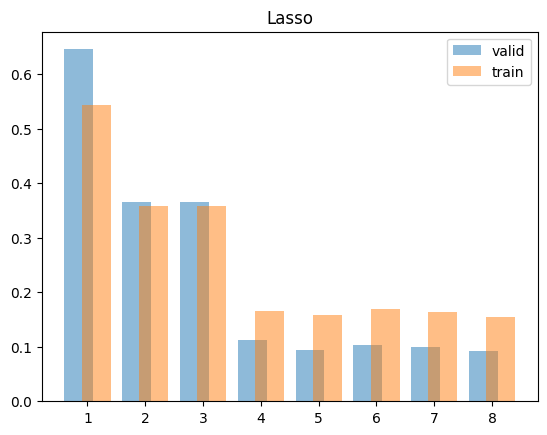

In [83]:
ax = [1,2,3,4,5,6,7,8]
import matplotlib.pyplot as plt

# Для перезагрузки plt
from importlib import reload
plt=reload(plt)

plt.bar(np.array(ax) - 0.15, graph_Lasso_valid, alpha=0.5, width=0.5)
plt.bar(np.array(ax) + 0.15, graph_Lasso_train, alpha=0.5, width=0.5)
plt.title('Lasso')
plt.legend(["valid", "train"])
plt.show()